# List 1

## Probability Refresher


### Knowledge & Skills:
- Random variables
- Rules of Probability for Discrete Variables
- Marginals and conditional probability
  - pdf - probability density functions
  - pmf - Probability mass function
- Independence, conditional Independence
- Bayes rule

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltc

from matplotlib.colors import LogNorm
from matplotlib.ticker import FuncFormatter
from matplotlib import animation, rc
from IPython.display import HTML
from random import randint

Exercise 1
============

** Write infinite random discrete values generator:**
  - integer number from given range
  - python generators 
  - yield
  
** Visualize how probability of given numbers change in time: **
  - matplotlib animation

C:\Programy\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


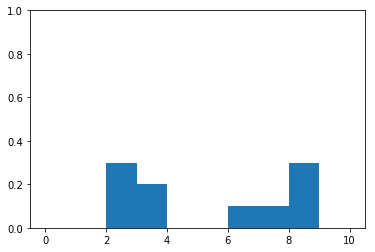

In [6]:
# Parameters
n = 10
minValue = 0
maxValue = 10
interval = 100

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

# Initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)
  
# Generator that yields items instead of returning a list
def randomGenerator(maxNumbers, min, max):
    i = 0
    while i < maxNumbers:
        yield randint(min, max)
        i += 1
        
# Initialization Array for data and random number generator       
data = [] 
gen = randomGenerator(n, minValue, maxValue)
line, = ax.plot([], [], lw=2)

# Animation function which re-draw every frame
def animate(num, data, gen): 
    ax.clear()
    ax.set_ylim(( 0, 1))
    data.append(next(gen)) 
    plt.hist(data, bins=maxValue - minValue, range=(minValue, maxValue), normed=True)
    ax.set_ylim(( 0, 1))

# Call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=n, interval=interval, fargs=(data, gen, ) )
HTML(anim.to_jshtml())

Exercise 2
============

Using generator from previous task, visualize probability of occurrence for two consecutive numbers (all possible pairs) in the stream (matplotlib animation, heatmaps).

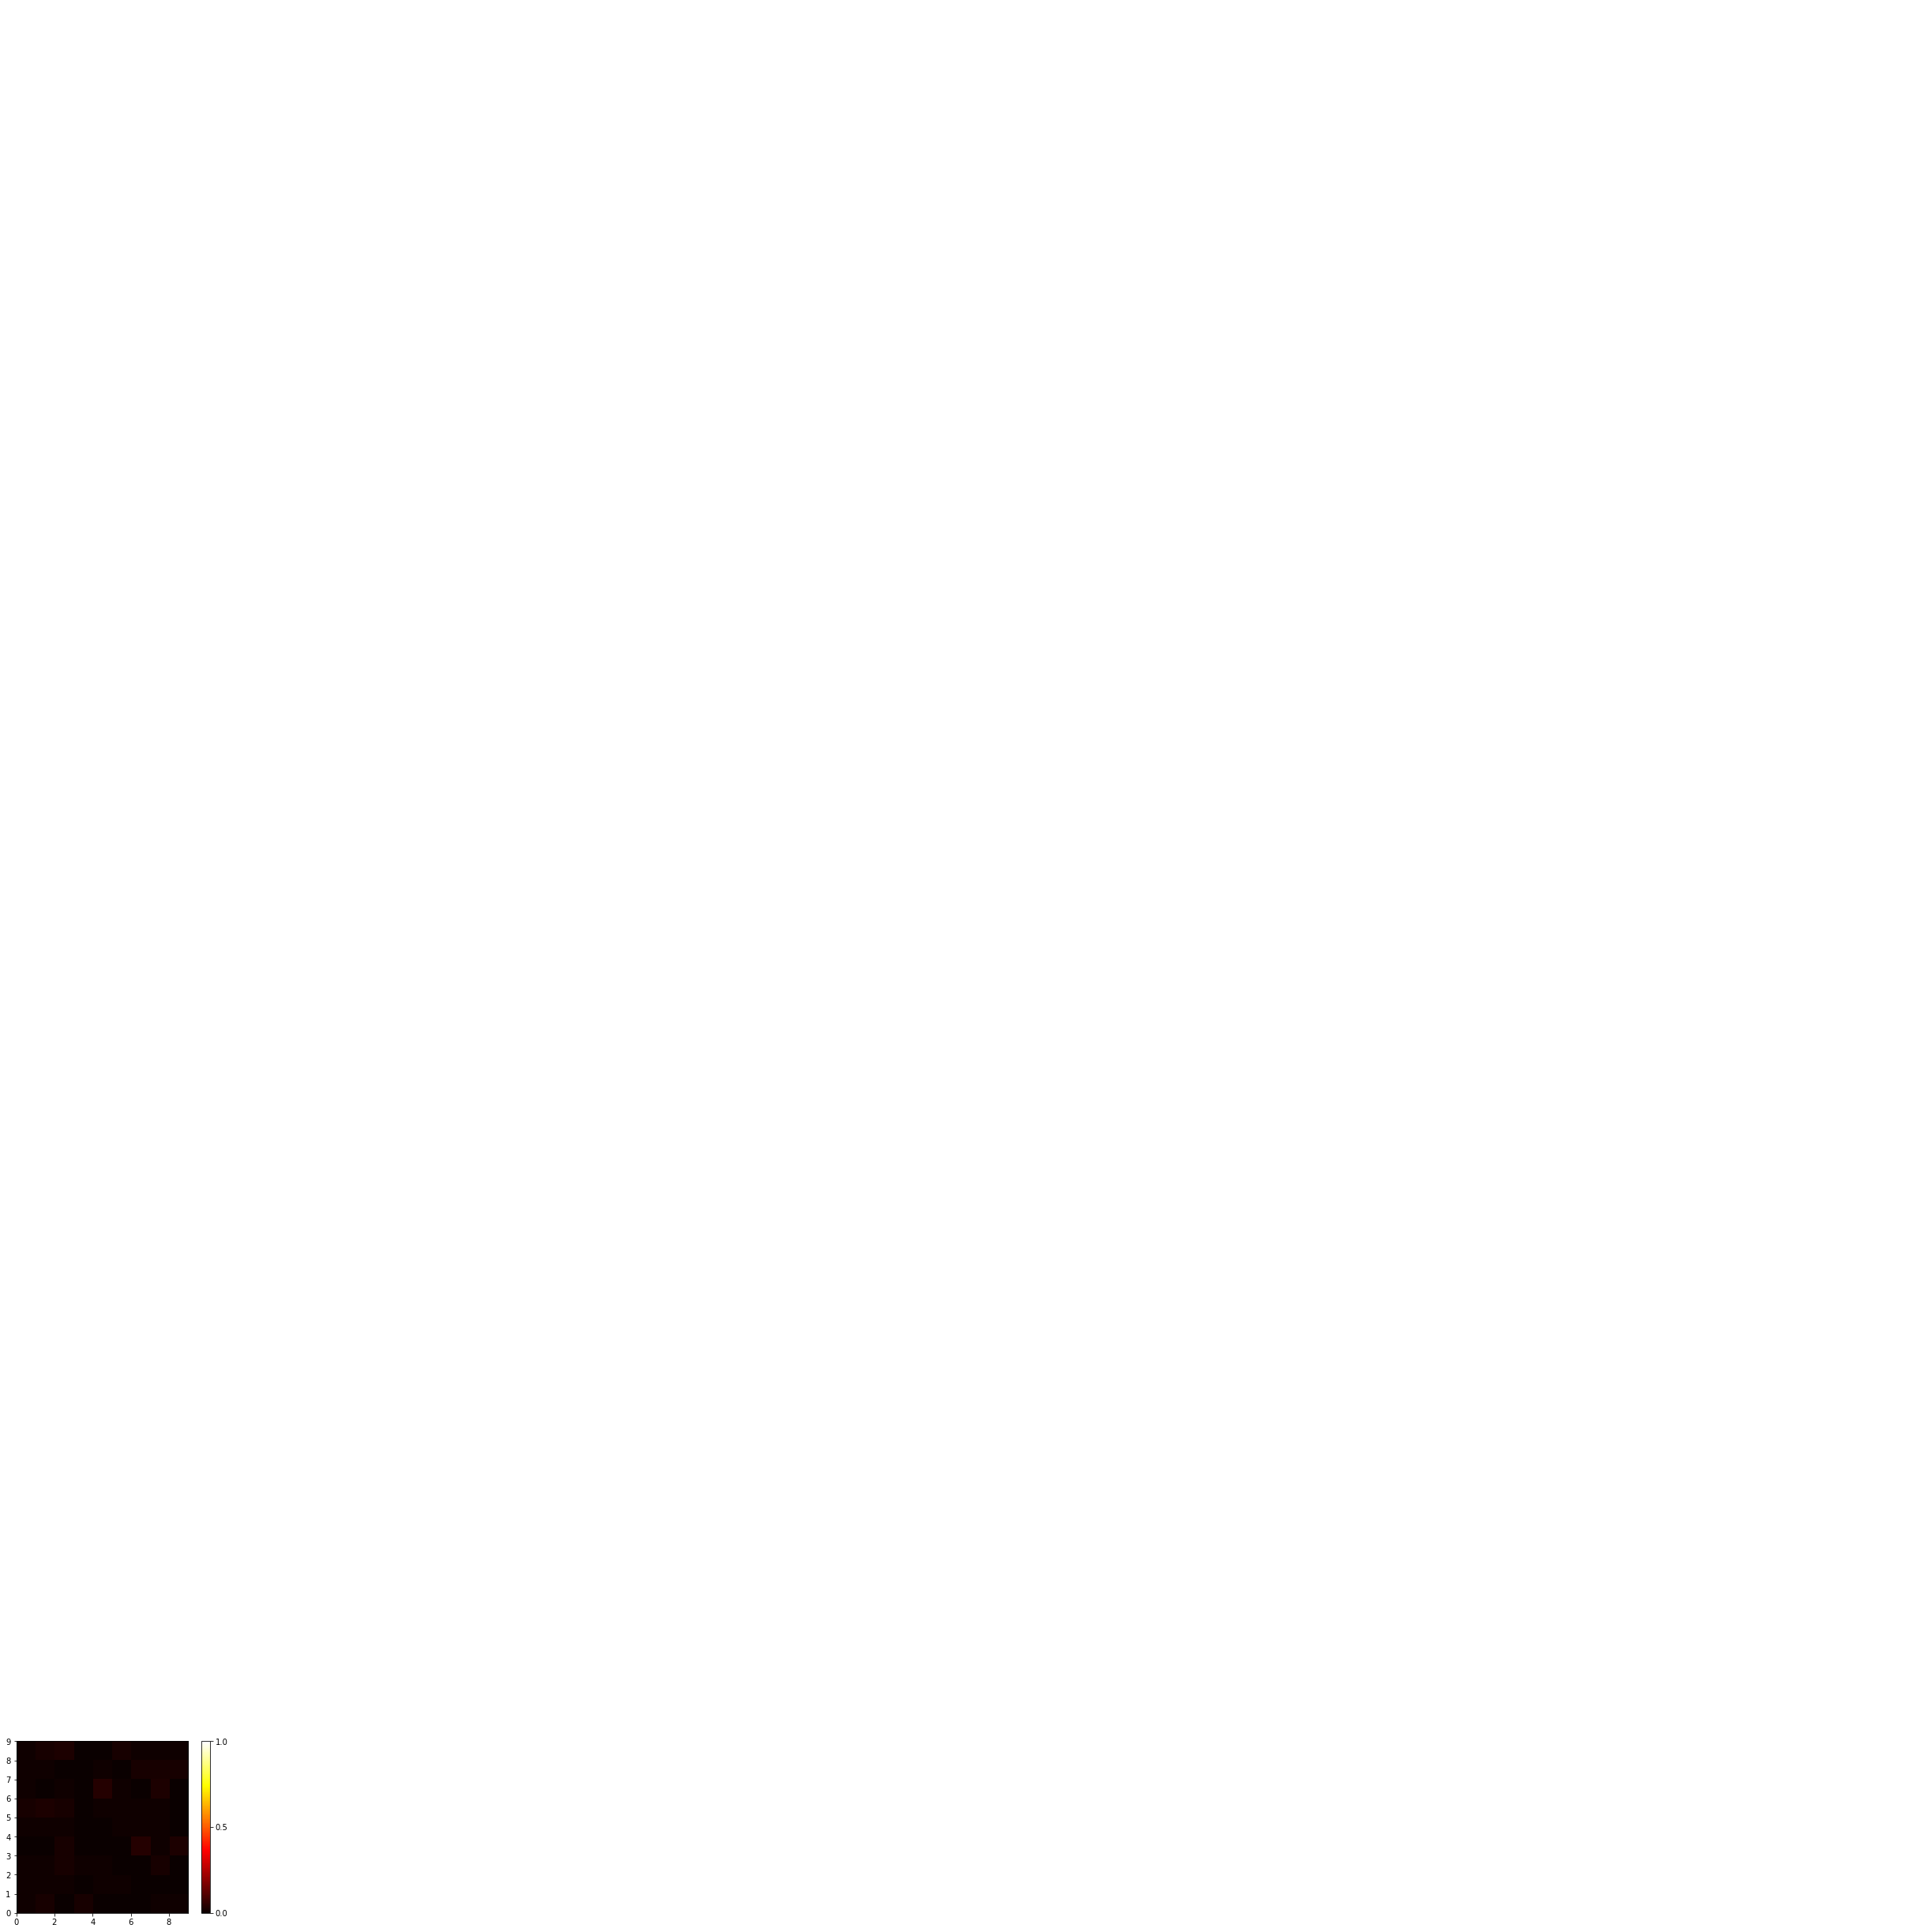

In [7]:
# Parameters
n = 100
minValue = 0
maxValue = 9
interval = 200

fig, ax = plt.subplots()

# Generator that yields items instead of returning a list
def randomGenerator(maxNumbers, min, max):
    i = 0
    while i < 2*n + 20:
        yield randint(min, max)
        i += 1

# Prepare data and init generator
dataX = []
dataY = []
gen = randomGenerator(n, minValue, maxValue)

# Draw first histogram and colorBar with "hot" colors
plt.hist2d(dataX, dataY, bins= (n, n),  range=[[0, n], [0, n]], normed=True)
plt.imshow((dataX, dataY), cmap='hot')
plt.colorbar( ticks=[0, 0.5, 1, 5, 10], orientation='vertical')

# Animation function which re-draw every frame
def animate(num, dataX, gen): 
    ax.clear()
    dataX.append(next(gen))   
    dataY.append(next(gen)) 
    plt.hist2d(dataX, dataY, bins= (n, n),  range=[[0, n], [0, n]], cmap='hot', vmin = 0, vmax = 1, normed=True)
    ax.set_ylim(( minValue, maxValue))
    ax.set_xlim(( minValue, maxValue))   

# Call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=n, interval=interval, fargs=(dataX, gen, ) )
HTML(anim.to_jshtml())

Exercise 3
============

Write a simulator for chances to be ill on a certain disease. We know that it affects from about 1 to 100 out of 50,000 people. There was developed a test to check whether the person has the disease and it is quite accurate: the probability that the test result is positive (suggesting the person has the disease), given that the person does not have the disease, is only 2 percent; the probability that the test result is negative (suggesting the person does not have the disease), given that the person has the disease, is only 1 percent. When a random person gets tested for the disease and the result comes back positive, what is the probability that the person has the disease? Check whole parameter space and visualise results.

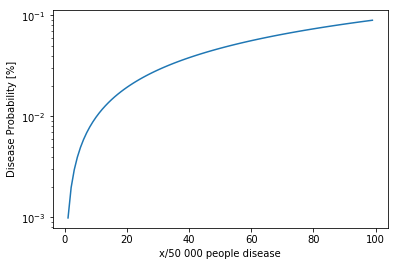

In [4]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
t = np.arange(1, 100, 1)

# Datas and parameters
PBnA = 0.02
PnBA = 0.01
PA = t/50000
PBA = 1 - PnBA
PnA = 1 - PA

x = (PBA*PA)/(PBA*PA + PBnA*PnA)

plt.semilogy(t, x)
plt.ylabel('Disease Probability [%]')
plt.xlabel('x/50 000 people disease')
plt.show()